In [2]:

# Import libraries
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [3]:
# DATA INGESTION

# Fetch the data
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [4]:
# Check the train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Check the test set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
# Check the train DataFrame
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Check the test DataFrame
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# Descriptive statistics of the train set
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Descriptive statistics of the test set
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
# Checking the missing values in the train set
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Checking the missing values in the test set
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
# Visualise age distribution in train and test sets
fig = make_subplots(rows=1, cols=2, subplot_titles=("Train Data", "Test Data"))
fig.add_trace(
    go.Histogram(x=train["Age"], nbinsx=50, name="Train", marker=dict(color='blue'), opacity=0.7),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(x=test["Age"], nbinsx=50, name="Test", marker=dict(color='red'), opacity=0.7),
    row=1, col=2
)
fig.update_layout(
    title_text="Age Distribution in Train and Test Datasets",
    showlegend=False,  # Set to True if you want legends
    bargap=0.1,
)
fig.show()

In [ ]:
# Age shown in a desc order in a train set
train['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [ ]:
# Age shown in descending order in a test set
test["Age"].value_counts().sort_values(ascending = False)

Age
21.00    17
24.00    17
22.00    16
30.00    15
18.00    13
         ..
3.00      1
58.00     1
0.17      1
59.00     1
38.50     1
Name: count, Length: 79, dtype: int64

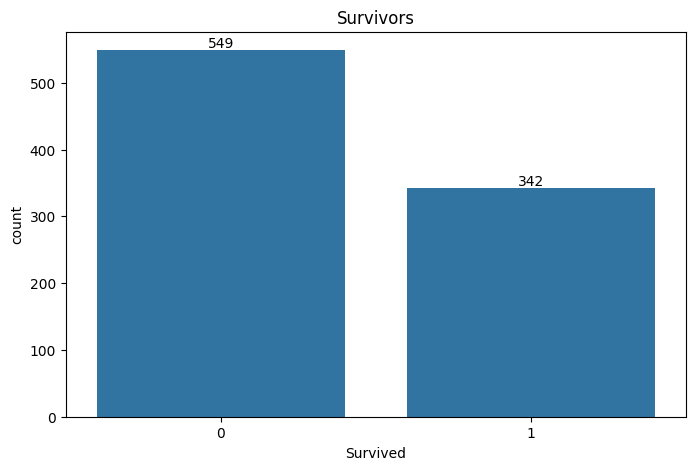

In [15]:
# Visualise how many people survived
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data=train, x='Survived', ax=ax)
ax.bar_label(ax.containers[0])
ax.set_title('Survivors')
plt.show()

Note:

based on this imbalanced distribution, we might want to lower the threshold for test probabilities to increase the number of positive class predictions ("1" for survival) if we're more interested in capturing all survivors (increasing recall).

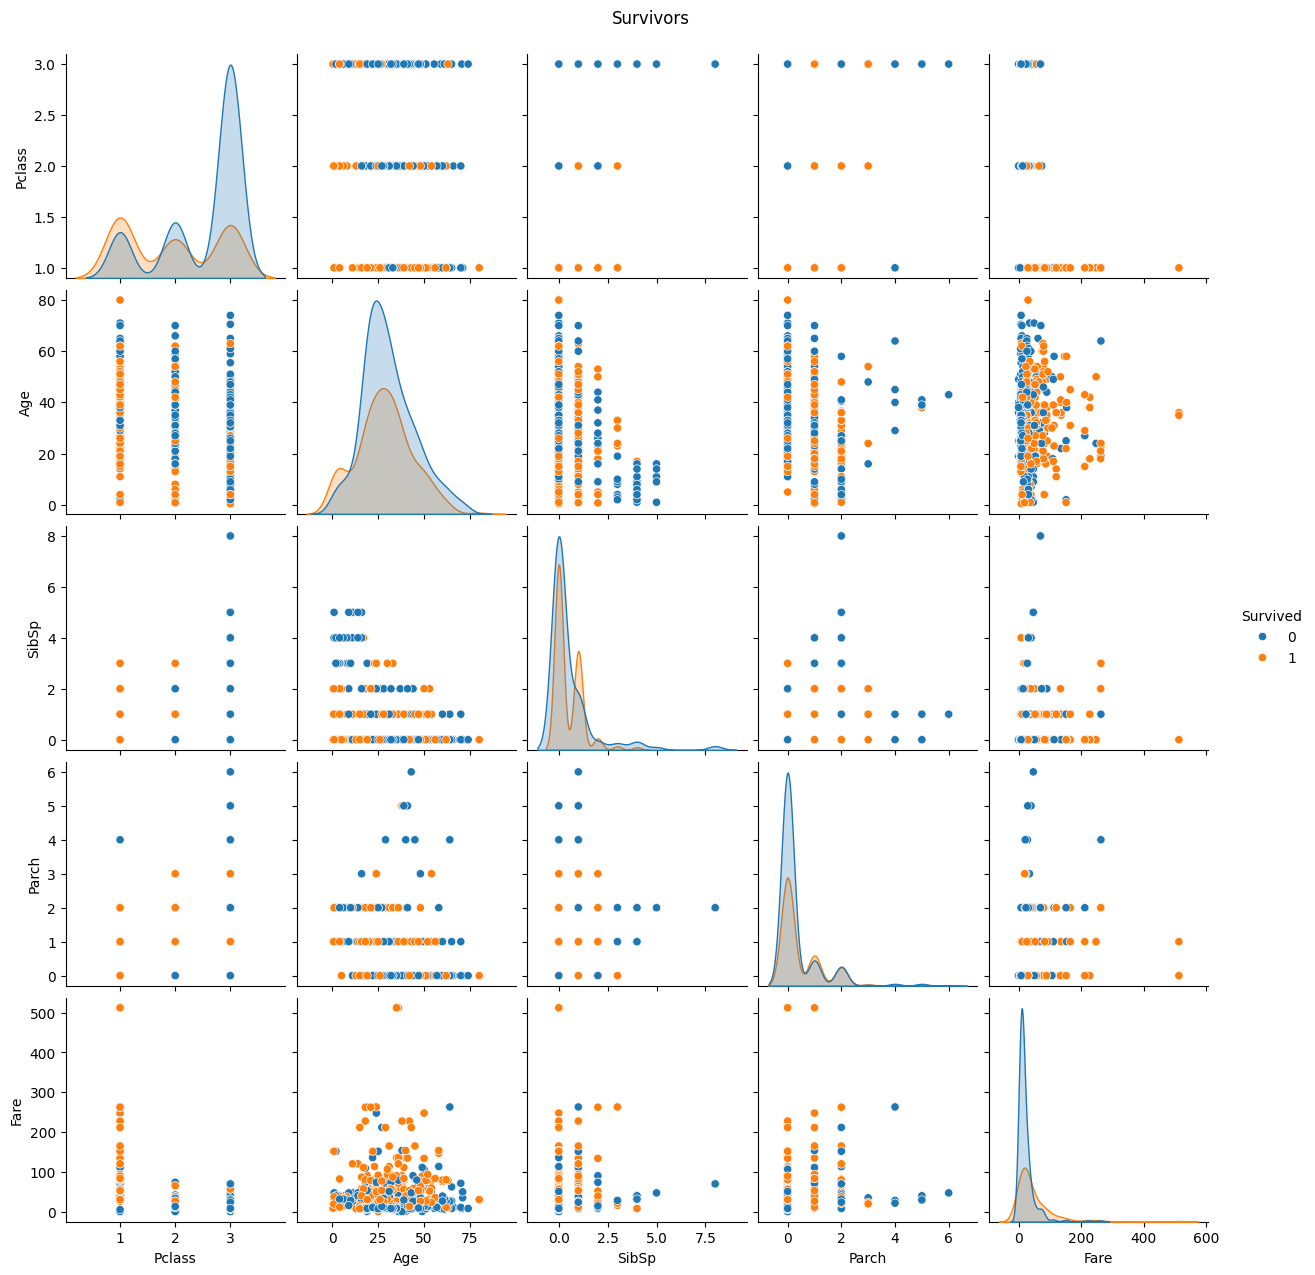

In [ ]:
# Visualise the relationship between the features 
train_noID=train.drop(['PassengerId'], axis=1) # drop the ID column for lighter visualisation
sns.pairplot(train_noID, hue='Survived')
plt.suptitle('Survivors', y=1.02)
plt.show()

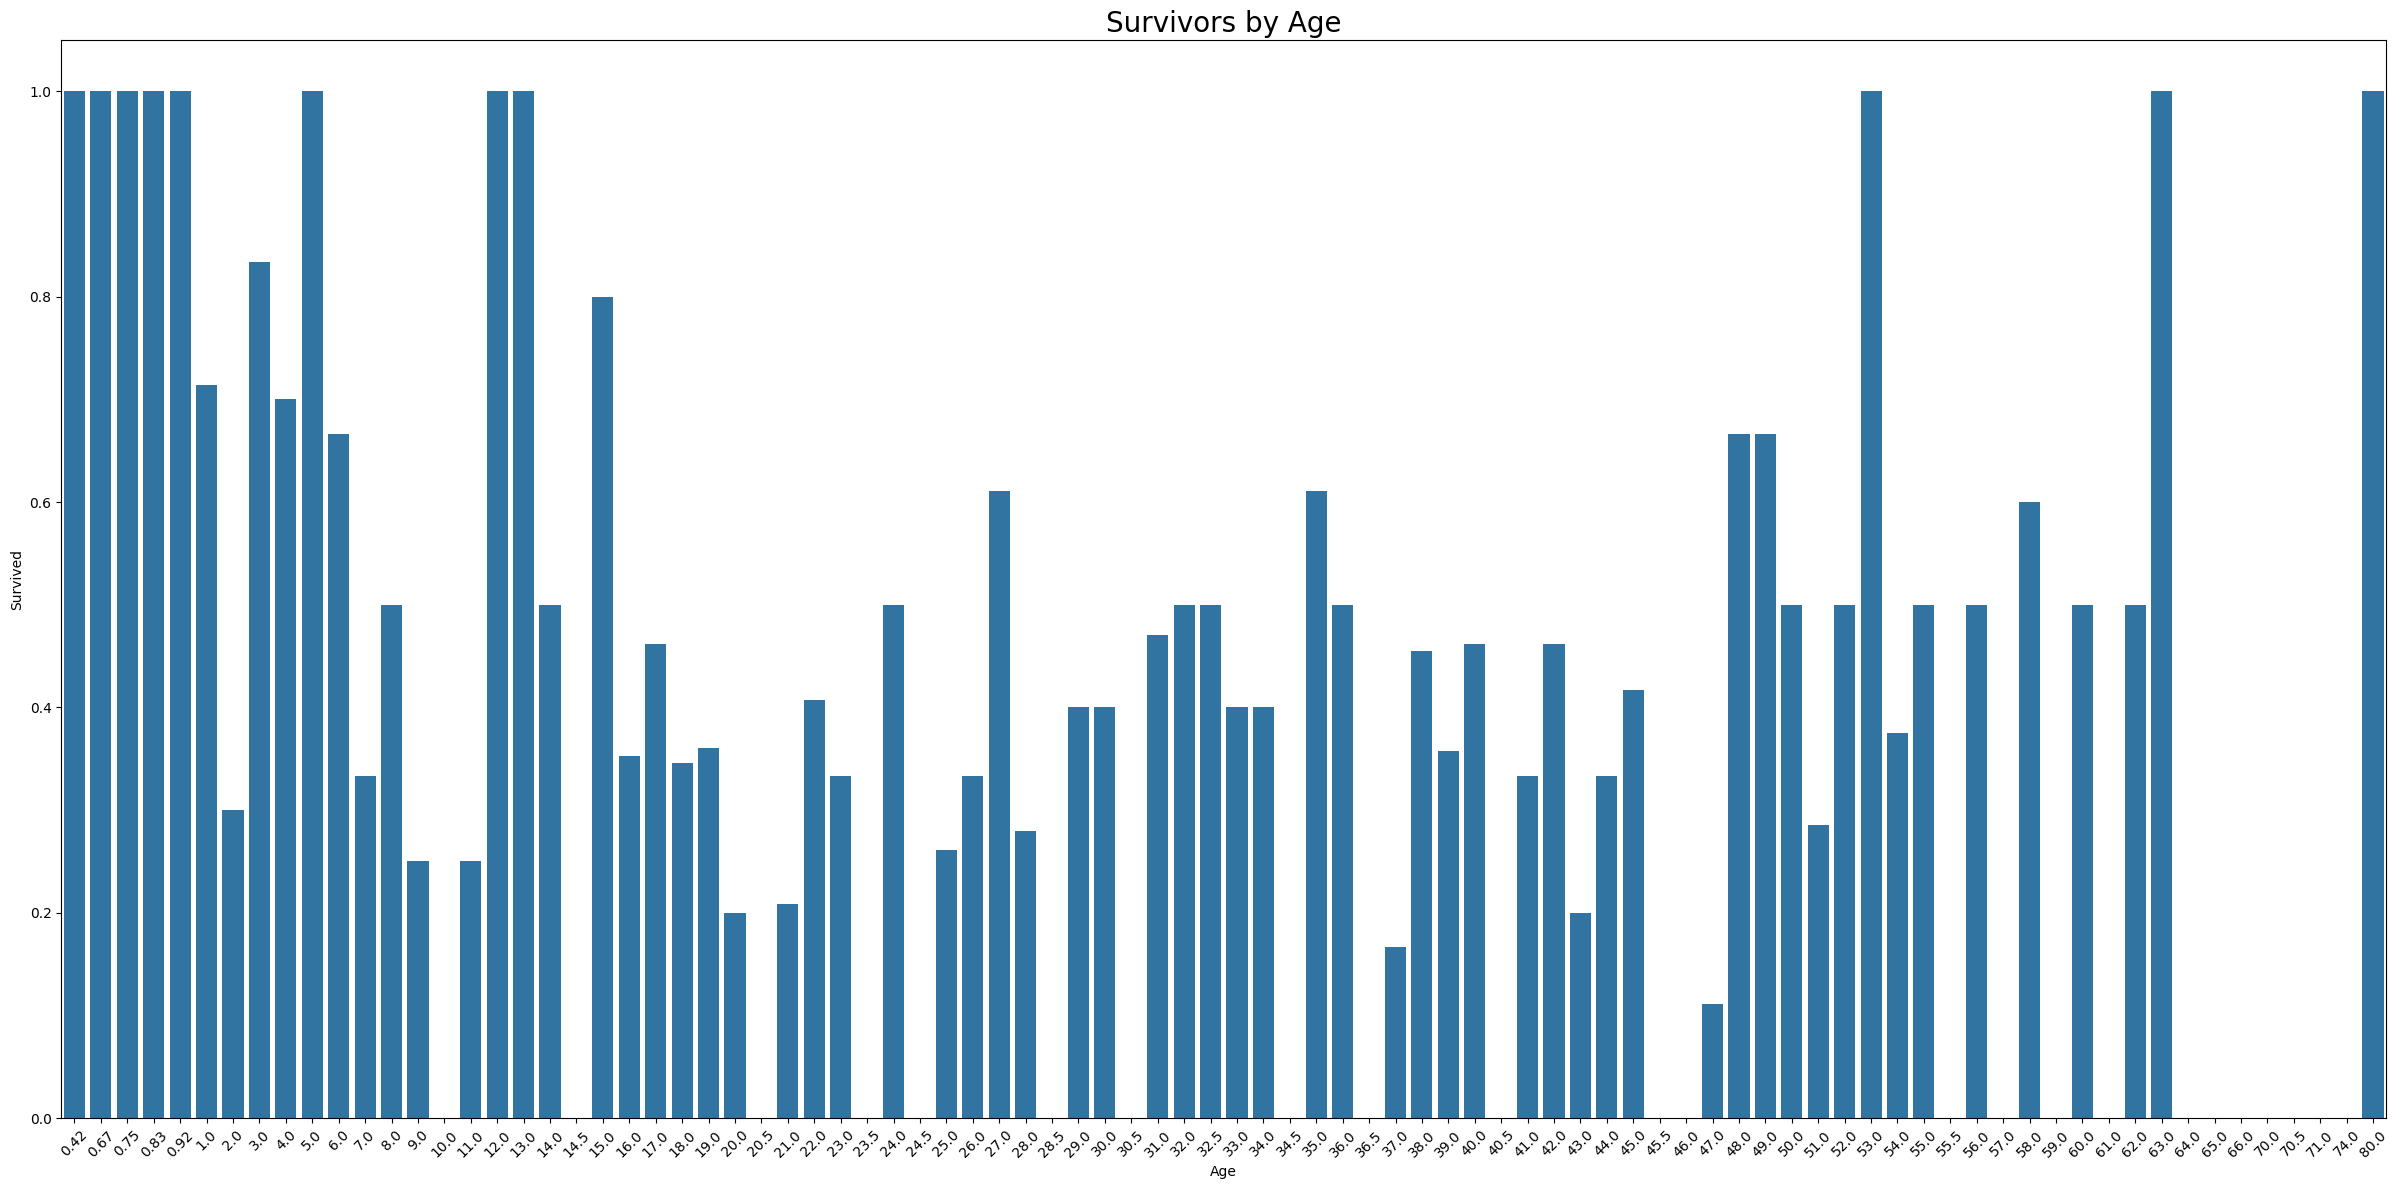

In [17]:
# Visualise the age distribution of the survivors
plt.figure(figsize=(30,14))
avg_survivors=train[['Age','Survived']].groupby(['Age'], as_index=False).mean()
avg_age=sns.barplot(data=avg_survivors, x='Age', y='Survived')
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.title('Survivors by Age', fontsize=20)
plt.show()

##### NOTE: 
- Infants and very young children (0–3 years): Have a very high survival rate (close to 1.0).
- Ages 5-10: Survival rates fluctuate but are still relatively high.
- Ages 20–40: The survival rates vary significantly. Some ages have high survival rates (closer to 1.0), while others show much lower survival rates.
- Older adults (50 and older): Show more fluctuation, with some older passengers having a good survival rate while others have much lower rates.

In [65]:
# Check age outliers for age feature of survivors
female_max=train[train['Sex'] == 'female']['Age'].max()
male_max=train[train['Sex'] == 'male']['Age'].max()
female_min=train[train['Sex'] == 'female']['Age'].min()
male_min=train[train['Sex'] == 'male']['Age'].min()
print(f"The maximum age for a female survivor is: {female_max}")
print(f"The maximum age for a male survivor is: {male_max}")
print(f"The minimum age for a female survivor is: {female_min}")
print(f"The minimum age for a male survivor is: {male_min}")

The maximum age for a female survivor is: 63.0
The maximum age for a male survivor is: 80.0
The minimum age for a female survivor is: 0.75
The minimum age for a male survivor is: 0.42


In [ ]:
# Visualise the age distribution of the survivors across gender in a train set
fig = px.scatter(train, x='Age', y='Survived', color='Sex', 
                    color_discrete_map={'male': 'light blue', 'female': 'orange'}, 
                    symbol='Sex', labels={'Sex': 'Gender'})
fig.update_layout(
    xaxis_title='Age vs Survived by Gender',
    yaxis_title='Survival (0 = No, 1 = Yes)',
    showlegend=True,
    legend_title='Gender'
)
fig.show()

Note:

- older women and younger men died
- outliers are present only for male value

Solution: Data is skewed to the right. Mean() method to deal with the outliers will introduce bias (influenced by outliers - older age), we will use median() as it is not sensitive to outliers and represents the central tendency. We take into accocunt age-survivor relationship in a train set only



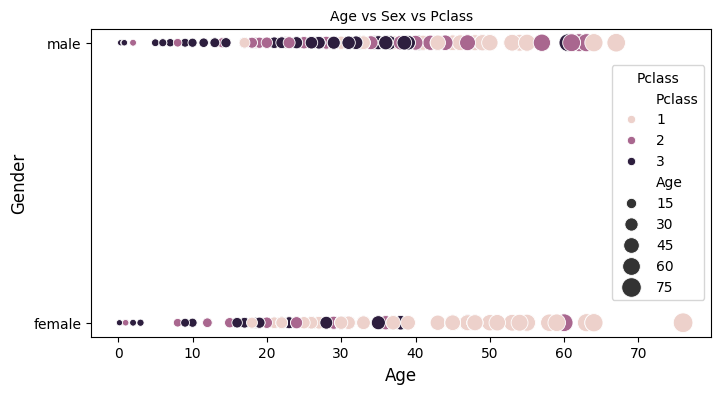

In [57]:
# Visualise the relationship between the age, gender, and class in a test set
plt.figure(figsize=(8, 4))
sns.scatterplot(data=test, x='Age', y='Sex', hue='Pclass', size="Age", sizes=(20, 200))
plt.title ('Age vs Sex vs Pclass', fontsize=10)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.legend(title='Pclass')
plt.show()

In [21]:
# Visualise fare distribution in train and test sets
fig = make_subplots(rows=1, cols=2, subplot_titles=("Train Data", "Test Data"))
fig.add_trace(
    go.Histogram(x=train["Fare"], nbinsx=50, name="Train", marker=dict(color='blue'), opacity=0.7),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(x=test["Fare"], nbinsx=50, name="Test", marker=dict(color='red'), opacity=0.7),
    row=1, col=2
)
fig.update_layout(
    title_text="Fare Distribution in Train and Test Datasets",
    showlegend=False,  # Set to True if you want legends
    bargap=0.1,
)
fig.show()

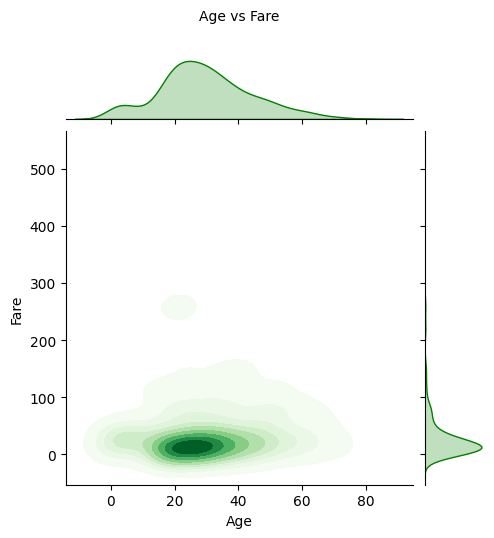

In [62]:
# Visualise the relationaship between age and fare in a test set 
g = sns.JointGrid(data=train, x='Age', y='Fare', height=5)
g.plot_joint(sns.kdeplot, cmap="Greens", fill=True)
g.plot_marginals(sns.kdeplot, color='green', fill=True)
g.ax_joint.set_title('Age vs Fare', fontsize=10, pad = 80)
plt.show()

Notes:

- Most passengers are concentrated around ages 20–40 with fares below $50
- The presence of outliers in fare and age might require adjustments if the model is sensitive to them

In [22]:
# Calculate the min, max, and average fare for a train set
fare_min = train['Fare'].min()
fare_max = train['Fare'].max()
fare_mean = train['Fare'].mean()

print(f"Minimum Fare: {fare_min}")
print(f"Maximum Fare: {fare_max}")
print(f"Average Fare: {fare_mean}")

Minimum Fare: 0.0
Maximum Fare: 512.3292
Average Fare: 32.204207968574636


In [23]:
# Calculate the min, max, and average fare for a test set
fare_min = test['Fare'].min()
fare_max = test['Fare'].max()
fare_mean = test['Fare'].mean()

print(f"Minimum Fare: {fare_min}")
print(f"Maximum Fare: {fare_max}")
print(f"Average Fare: {fare_mean}")

Minimum Fare: 0.0
Maximum Fare: 512.3292
Average Fare: 35.627188489208635


In [24]:
# Fare shown in descending order
train["Fare"].value_counts().sort_values(ascending = False)

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
32.3208     1
8.3625      1
8.4333      1
25.5875     1
10.5167     1
Name: count, Length: 248, dtype: int64

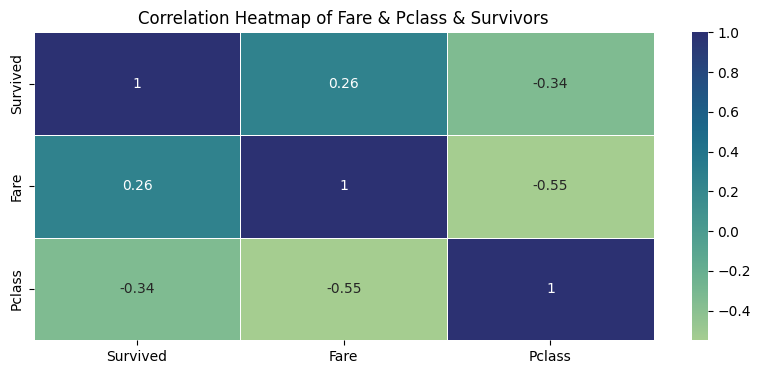

In [25]:
# Visualise the relationship among fare, Pclass, and survivors features
df_corr= train[['Survived', 'Fare', 'Pclass']]
corr = df_corr.corr()
plt.figure(figsize=(10, 4))
#cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, annot=True, linewidth=.5, cmap='crest') #cbar=True, #vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Fare & Pclass & Survivors')
plt.show()

Note:

- Survived vs Pclass: moderate -ve corr. Passengers in higher class were more likely to survive

- Age vs Pclass: moderate -ve corr, younger passengers tended to be in higher classes

In [26]:
# Visualise the relationship among age, Pclass, and survivors features
df_corr= train[['Survived', 'Age', 'Pclass']]
corr = df_corr.corr()
fig = px.imshow(corr, text_auto=True)
fig.update_layout(
    width=770,
    height=500  
)
fig.show()

In [27]:
# Visualise the survivors across age, fare, class, and sex features
fig = px.scatter_3d(
            train,
            x='Age',  
            y='Fare',  
            z='Pclass',  
            color="Survived",
            title="Survivors - 3D Plot",
            labels={"Survived": "Survival (0 = No, 1 = Yes)"},
            color_continuous_scale=["gray", "green"],
            hover_data=train.columns,
             size_max=10,
            opacity=0.8
        )
fig.update_layout(
            title="Age vs Fare vs Class vs Gender across Survivors",
            title_x=0.5, 
            width=1000,
            height=600,
            showlegend=True
        )
fig.show()

##### NOTE: 

- most survivors are from the 1st class
- most survivors are younger
- the higher the fare, the more survivors

In [40]:
# Max number of siblings and spouses
sibsp = train['SibSp'].max()
# Max num of parents & children
parch = train['Parch'].max()

print(f"Max number of siblings and spouses: {sibsp}")
print(f"Max number of parents and children: {parch}")

Max number of siblings and spouses: 8
Max number of parents and children: 6


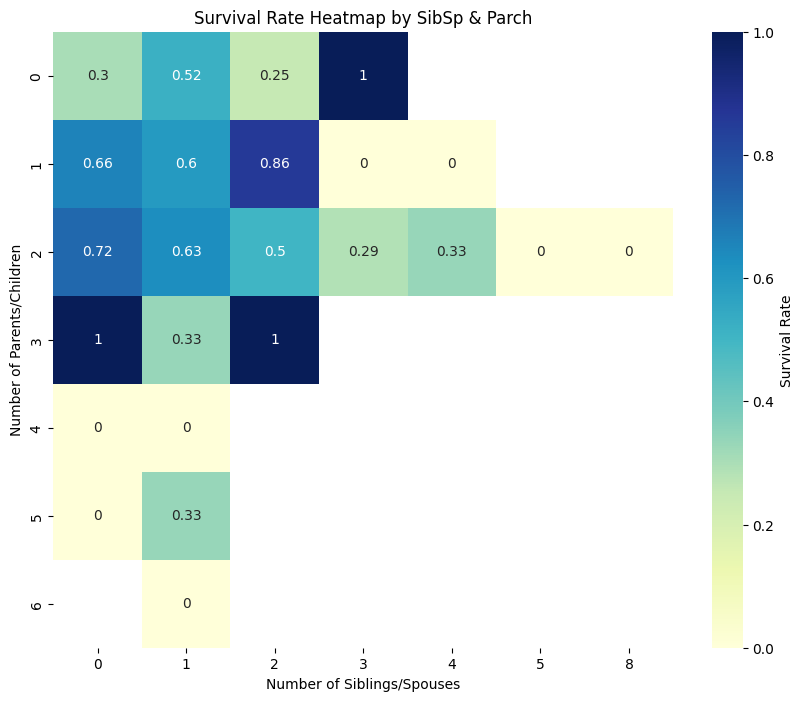

In [47]:
# Create a pivot table for the heatmap
pivot_table = train.pivot_table(values='Survived', index='Parch', columns='SibSp', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Survival Rate'})
plt.title('Survival Rate Heatmap by SibSp & Parch')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Number of Parents/Children')
plt.show()

Note: 
High Survival Rates:

    Passengers with 2 parents/children and 1 sibling/spouse had a survival rate of 0.86, which is the highest in the heatmap. This indicates that most of these passengers survived.
    Passengers with 3 parents/children and 0 siblings/spouses also had a high survival rate of 1.0, meaning all of these passengers survived.

Moderate Survival Rates:
    
    Passengers with 1 parent/child and 0 siblings/spouses had a survival rate of 0.66. This shows a good chance of survival for this group as well.
    For 2 siblings/spouses and 1 parent/child, the survival rate was 0.72, indicating a relatively high chance of survival.

Low Survival Rates:
    
    Passengers with 1 parent/child and 3 siblings/spouses had a survival rate of 0.29, indicating that survival decreased with a larger number of siblings/spouses when also having a parent/child.
    Passengers with 4 or more parents/children had 0 survival, indicating none survived in those groups.

Zero Survival Rates:
    
    Groups with very high counts in either SibSp or Parch (like 5 SibSp or 6 Parch) show 0 survivors, suggesting that these combinations may not have had sufficient numbers of passengers to yield any survivors.

In [48]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [49]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train['Embarked'].isnull().sum()/train.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


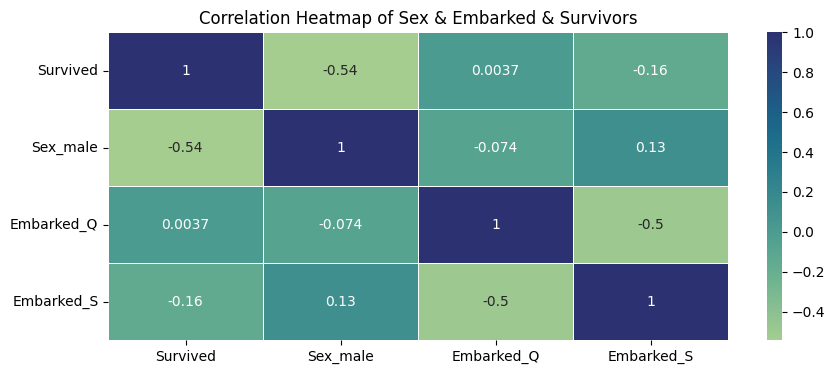

In [53]:
# Visualise the relationship across sex, embarked, and survivors features
df_corr = pd.get_dummies(train[['Sex', 'Embarked', 'Survived']], drop_first=True)
corr = df_corr.corr()
plt.figure(figsize=(10, 4))
sns.heatmap(corr, annot=True, linewidth=.5, cmap='crest')
plt.title('Correlation Heatmap of Sex & Embarked & Survivors')
plt.show()

Notes:
- males were much less likely to survive than females
- passengers who embarked at Southampton were slightly less likely to survive